In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [59]:
df=pd.read_csv('force2020_data_unsupervised_learning.csv',index_col='DEPTH_MD')

In [60]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [61]:
df.shape

(18270, 5)

In [62]:
df.isnull().values.any()

True

In [63]:
df.isnull().sum()

RHOB       0
GR         0
NPHI    4238
PEF     1830
DTC       81
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836


In [66]:
df.isnull().sum()

RHOB    0
GR      0
NPHI    0
PEF     0
DTC     0
dtype: int64

In [67]:
df.shape

(12202, 5)

In [68]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [69]:
scaler=StandardScaler()

In [70]:
cols_to_scale=df.columns
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [71]:
df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,-1.335919,-0.092056,1.617342,-1.325067,0.752808


In [72]:
# Create function to work out optimum number of clusters
def optimise_k_means(data,max_k):
    k,inertia=[],[]
    for i in range(1,max_k):
        kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        k.append(i)
        
    # Generate the elbow plot
    plt.figure(figsize=(9,7))
    plt.plot(k,inertia,'o-')
    plt.title('Elbow Diagram')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

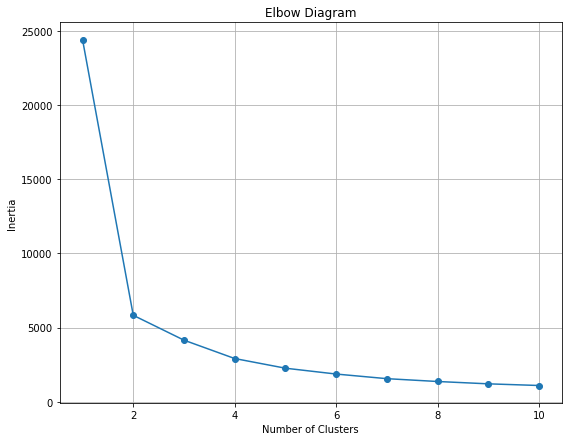

In [73]:
optimise_k_means(df[['RHOB','NPHI']],11)

In [74]:
model=KMeans(n_clusters=2,init='k-means++',n_init=10)
model.fit(df[['RHOB','NPHI']])

KMeans(n_clusters=2, n_init=10)

In [75]:
df['cluster']=model.labels_

In [76]:
df.sample(5)

,RHOB,GR,NPHI,PEF,DTC,cluster
DEPTH_MD,,,,,,
1539.072,0.016312,0.002898,0.037655,-0.483948,0.171276,0
2219.120,0.169960,-0.724285,-0.177555,-0.308573,-0.085090,0
1968.320,-0.339160,0.359637,0.915967,-0.572389,0.780469,0
2211.064,-0.221054,-0.417861,0.484358,0.513713,0.056698,0
2745.952,0.091318,3.862845,0.701794,0.851616,0.274169,0


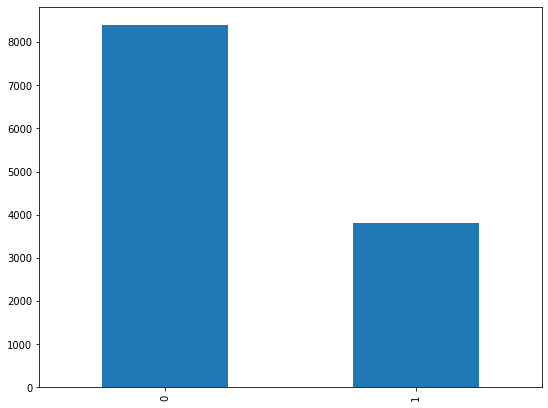

In [77]:
plt.figure(figsize=(9,7))
df['cluster'].value_counts().plot(kind='bar')
plt.show()

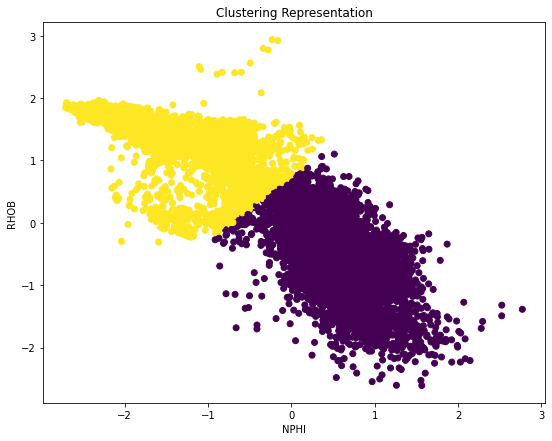

In [78]:
plt.figure(figsize=(9,7))
plt.scatter(x=df['NPHI'],y=df['RHOB'],c=df['cluster'])
plt.title('Clustering Representation')
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.show()

In [79]:
pickle.dump(df,open('df.pickle','wb'))
pickle.dump(model,open('model.pickle','wb'))